In [14]:
import pandas as pd
import numpy as np

df1=pd.read_csv("car data.csv")
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## PREPROCESSING

In [19]:
own={3:2}
df1["Owner"]=df1["Owner"].replace(own)
pet={"Petrol":1,
     "Diesel":2,
     "CNG":3}
sell={"Dealer":1,
     "Individual":2}
drive={"Manual":1,
      "Automatic":2}

df1["Fuel_Type"]=df1["Fuel_Type"].replace(pet)
df1["Seller_Type"]=df1["Seller_Type"].replace(sell)
df1["Transmission"]=df1["Transmission"].replace(drive)

In [20]:
df1.drop(["Car_Name"],axis=1,inplace=True)

In [21]:
df1["Year"]=2021-df1['Year']

# EDA

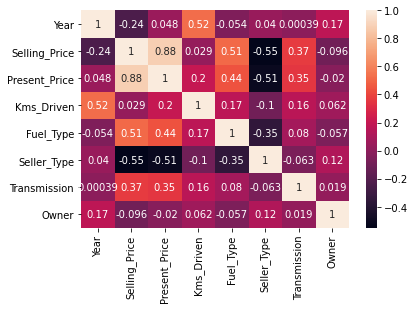

In [7]:
import seaborn as sns

sns.heatmap(df1.corr(),annot=True);

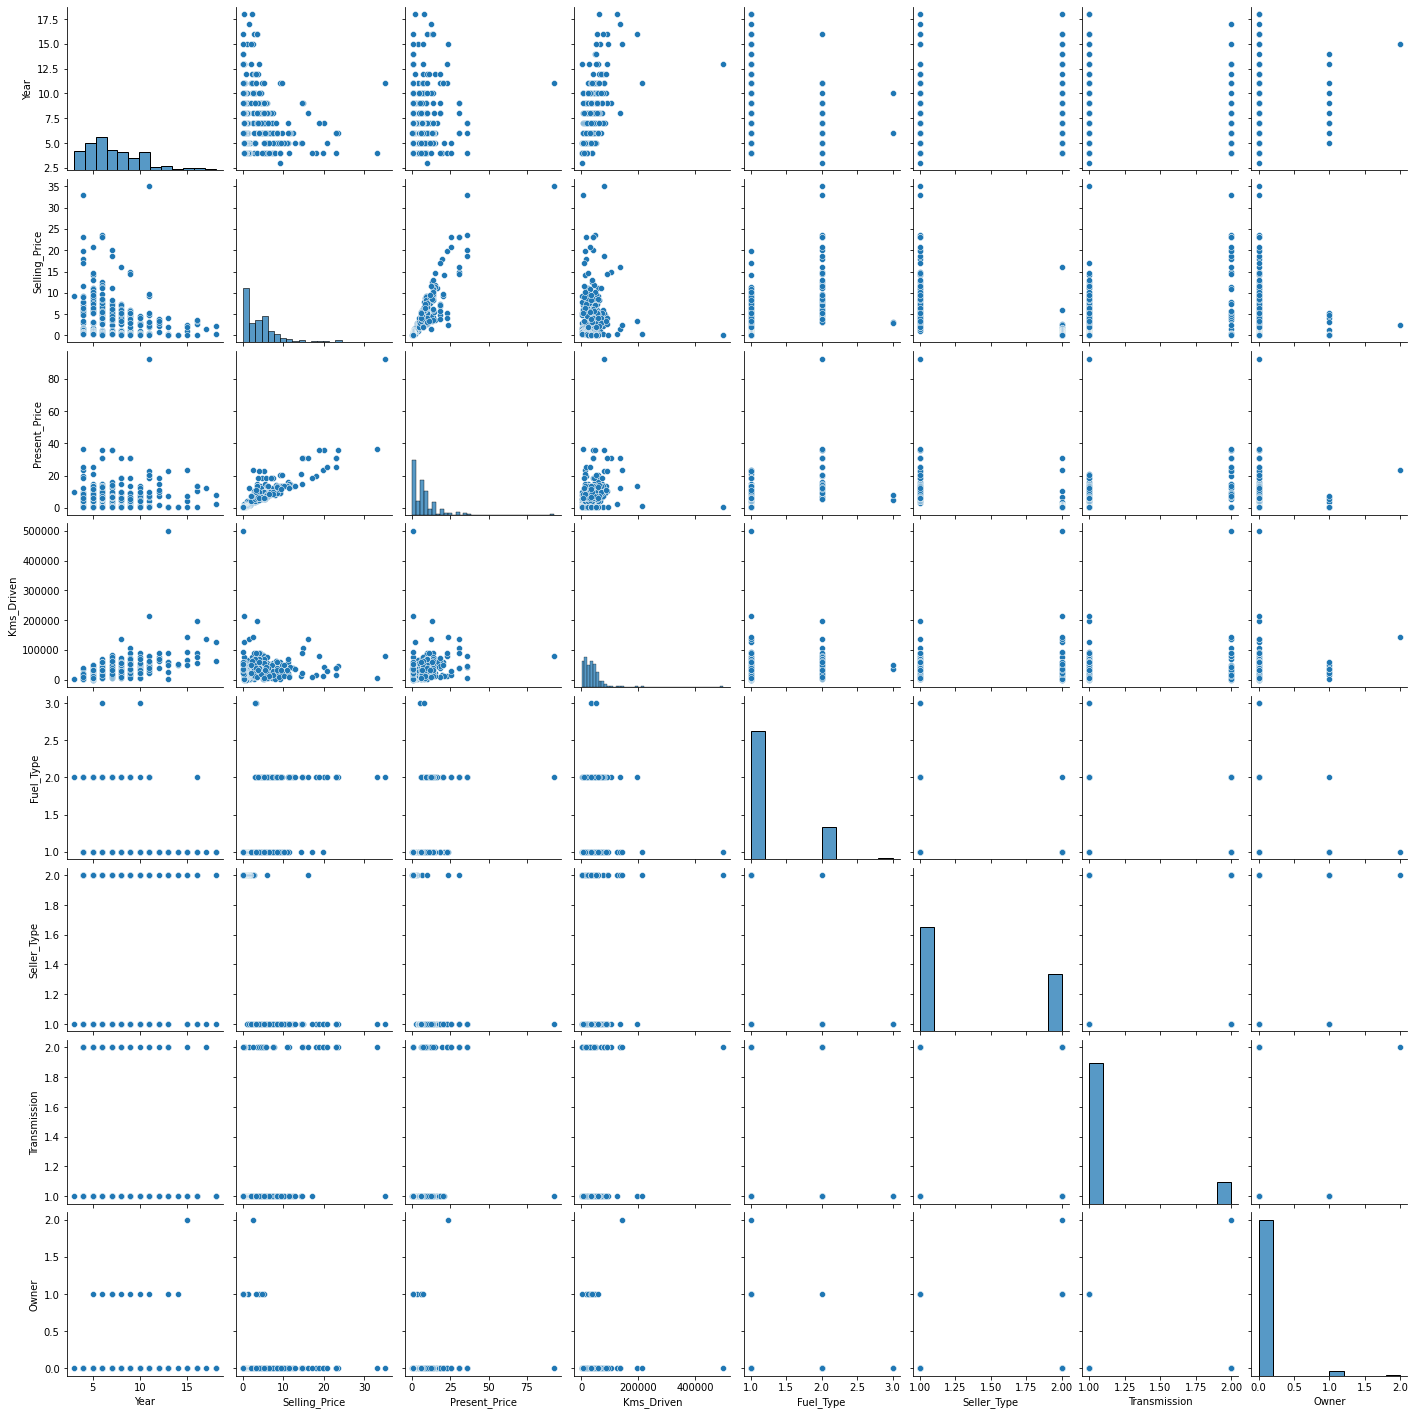

In [8]:
sns.pairplot(df1);

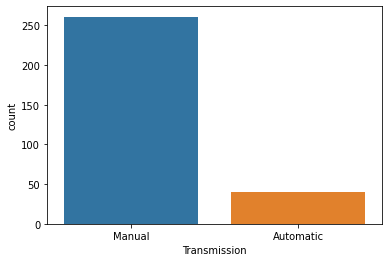

In [15]:
import matplotlib.pyplot as plt
sns.countplot(x="Transmission",data=df1);


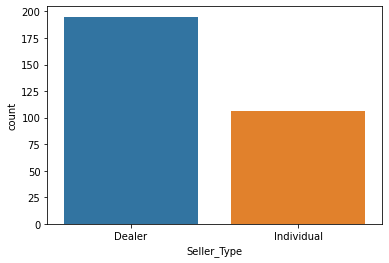

In [17]:
sns.countplot(x="Seller_Type",data=df1);

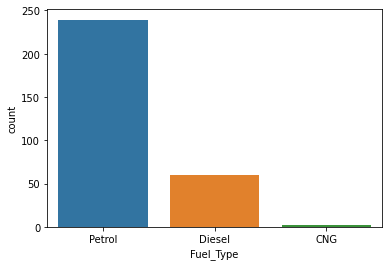

In [18]:
sns.countplot(x="Fuel_Type",data=df1);

# Model Building

In [22]:
X=df1[["Year","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]
y=df1["Selling_Price"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y);

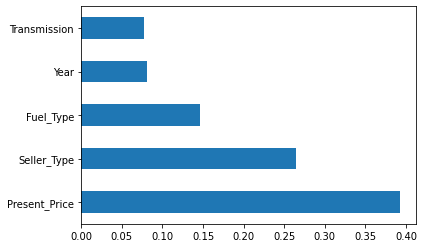

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 25)


In [27]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [28]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_pred, y_test)))
print(mean_absolute_error(y_pred, y_test))

1.1034751503243077
0.6857056830601127


In [29]:
import joblib
joblib.dump(regressor,"car_price.h5")

['car_price.h5']